# Problema da Mochila


### Solução por Força Bruta

In [112]:
import random
from itertools import combinations
import time
import matplotlib.pyplot as plt

In [113]:
# Quantidade total de items
num_items15 = 15

In [114]:
# Capacidade da mochila
sack_capacity = 50

In [115]:
# Atribuindo pesos para cada item randomicamente

def generateItems(num_items):
    items = [
        {'weight': random.randint(1,20), 'value': random.randint(10, 100)}
        for _ in range(num_items)
    ]
    return items
    

items15 = generateItems(num_items15)

In [116]:
for i, item in enumerate(items15):
    print(f'Item {i + 1}: {item}')

Item 1: {'weight': 10, 'value': 55}
Item 2: {'weight': 18, 'value': 48}
Item 3: {'weight': 20, 'value': 56}
Item 4: {'weight': 2, 'value': 82}
Item 5: {'weight': 4, 'value': 23}
Item 6: {'weight': 12, 'value': 88}
Item 7: {'weight': 11, 'value': 63}
Item 8: {'weight': 13, 'value': 24}
Item 9: {'weight': 17, 'value': 46}
Item 10: {'weight': 6, 'value': 39}
Item 11: {'weight': 1, 'value': 20}
Item 12: {'weight': 16, 'value': 13}
Item 13: {'weight': 1, 'value': 78}
Item 14: {'weight': 16, 'value': 69}
Item 15: {'weight': 12, 'value': 35}


#### Algoritmo de Força Bruta

In [117]:
def knapsack_brute_force(items, capacity):

    start = time.time() # Registra o tempo de execução

    n = len(items)
    best_value = 0
    best_combination = None
    used_capacity = None
    
    for r in range(n + 1): #Quantidade de elementos na combinação
        for combination in combinations(items, r): #Combinação de r itens
            total_weight = sum(item['weight'] for item in combination)
            total_value = sum(item['value'] for item in combination)
            if total_weight <= capacity and total_value > best_value:
                best_value = total_value
                best_combination = combination
                used_capacity = total_weight

    end = time.time() - start # Coleta o tempo de execução

    return best_value, best_combination, used_capacity, end

In [186]:
# Função para printar os resultados

def showResults(value, combination, capacity, time, items):
    for item in combination:
        index = items.index(item)
        print(index, end=' ')
    print(f'\nValor Final: {value}\nCapacidade Final: {capacity}\nTempo Total: {time:.4f} s')


In [ ]:
# Exibe resultados
showResults(*knapsack_brute_force(items15, sack_capacity), items15)

0 3 4 5 6 9 10 12 
Valor Final: 448
Capacidade Final: 47
Tempo Total: 0.0588 s


### Introduzindo novos items na mochila

20 Itens

In [189]:
# 20 Itens 
items20 = generateItems(20)
showResults(*knapsack_brute_force(items20, sack_capacity), items20)

3 4 7 9 13 16 17 18 19 
Valor Final: 624
Capacidade Final: 50
Tempo Total: 1.4099 s


22 Itens

In [190]:
# 22 Itens 
items22 = generateItems(22)
showResults(*knapsack_brute_force(items22, sack_capacity), items22)

1 2 3 6 7 8 11 13 14 16 17 18 
Valor Final: 632
Capacidade Final: 49
Tempo Total: 6.0386 s


24 Itens

In [191]:
# 24 Itens 
items24 = generateItems(24)
showResults(*knapsack_brute_force(items24, sack_capacity), items24)

0 1 2 4 9 11 12 14 17 21 22 
Valor Final: 724
Capacidade Final: 50
Tempo Total: 33.7420 s


26 Itens 

In [ ]:
# 26 Itens 
items26 = generateItems(26)
showResults(*knapsack_brute_force(items26, sack_capacity), items26)

30 Itens

In [ ]:
# 30 Itens 
items30 = generateItems(30)
showResults(*knapsack_brute_force(items30, sack_capacity), items30)

### Plotando os gráficos

In [ ]:
#Inserindo valores de 15 itens
times.insert(0, time)
num_items = [15, 20, 22, 24, 26, 30]

print(times)
print(num_items)

[0.050644874572753906, 1.4326226711273193, 5.88180136680603, 25.755443572998047, 111.34951567649841, 2032.8912761211395]
[15, 20, 22, 24, 26, 30]


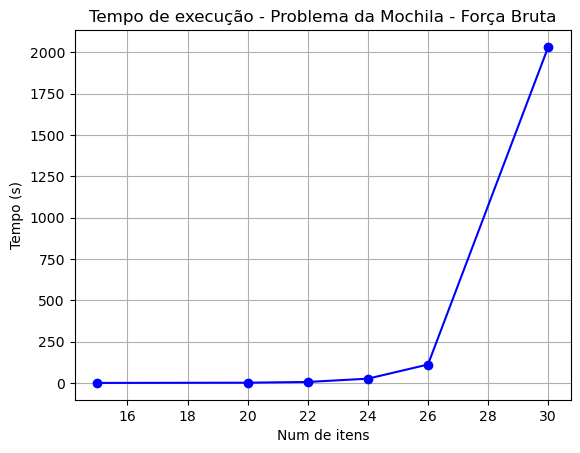

In [52]:
# Função de plotar
plt.plot(num_items, times, marker='o', linestyle='-', color='b', label='Line 1')

#Definindo titulo e legendas
plt.xlabel('Num de itens')
plt.ylabel('Tempo (s)')
plt.title('Tempo de execução - Problema da Mochila - Força Bruta')
plt.grid(True)

## Solução por Algoritmo Genético

Tamanho da população: 100
Forma de Seleção: Rank Selection + Wheel 
Tipo de Crossover: Uniform Crossover + Two-Point Crossover

In [141]:
# Parametros iniciais
NUM_ITEMS = 15
POP_SIZE = 100
CAPACITY = 50
CROSSOVER_RATE = 0.8
DIVISION_NUM = 2
MUTATION_RATE = 0.05
ELITE_RATE = 0.1
GENERATION_NUM = 100

In [142]:
items = generateItems(NUM_ITEMS)

In [143]:
for i, item in enumerate(items):
    print(f'Item {i + 1}: {item}')

Item 1: {'weight': 13, 'value': 84}
Item 2: {'weight': 13, 'value': 98}
Item 3: {'weight': 5, 'value': 21}
Item 4: {'weight': 6, 'value': 81}
Item 5: {'weight': 4, 'value': 68}
Item 6: {'weight': 1, 'value': 44}
Item 7: {'weight': 11, 'value': 22}
Item 8: {'weight': 19, 'value': 27}
Item 9: {'weight': 16, 'value': 83}
Item 10: {'weight': 2, 'value': 77}
Item 11: {'weight': 20, 'value': 93}
Item 12: {'weight': 8, 'value': 49}
Item 13: {'weight': 14, 'value': 36}
Item 14: {'weight': 15, 'value': 39}
Item 15: {'weight': 4, 'value': 22}


In [144]:
# Definição da população inicial (binaria)

def generateIndividual(items):
    return [random.randint(0, 1) for _ in range(len(items))]

# Inicialização da população
def generatePopulation(items):
    return [generateIndividual(items) for _ in range(POP_SIZE)]

In [145]:
population = generatePopulation(items)

population

[[0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1],
 [0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1],
 [1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0],
 [1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0],
 [1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1],
 [1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1],
 [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0],
 [0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0],
 [0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1],
 [1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0],
 [0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0],
 [1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1],
 [0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0],
 [1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1],
 [0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0],
 [0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1],
 [0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1],
 [0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0],
 [1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
 [1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,

### Avalição de cada indivíduo

In [146]:
#Função de avaliação (fitness)

def fitness(individual, items):
    total_weight = total_value = 0
    #Percorre o cromossomo do indivíduo
    for gene, item in zip(individual, items):
        #Se o bit for igual a 1, o item será incluído na mochila
        if gene:
            #Calcula o peso e o valor
            total_weight += item['weight']
            total_value += item['value'] 
        # Se excedeu a capacidade máxima
        if total_weight > CAPACITY:
            return 0 # Penalização
    #Quanto maior o valor, melhor o fitness
    return total_value

In [147]:
# Salva o cada individuo com seu valor fitness associado em uma tupla
evaluated_population = [(individual, fitness(individual, items)) for individual in population]

evaluated_population

[([0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1], 0),
 ([0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1], 0),
 ([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0], 0),
 ([1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0], 374),
 ([1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1], 0),
 ([1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1], 0),
 ([1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], 285),
 ([1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0], 0),
 ([0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0], 0),
 ([0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1], 222),
 ([1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0], 0),
 ([0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0], 362),
 ([1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1], 0),
 ([0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0], 0),
 ([1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1], 0),
 ([0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0], 0),
 ([0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1], 0),
 ([0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1], 0),
 ([0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

### Seleção dos indivíduos


In [148]:
# Função de rankeamento 

def rankAssignment(evaluated_population):
    # Ordena a população por ordem cresente de fitness
    evaluated_population = sorted(evaluated_population, key=lambda x: x[1])

    # Atribui o valor de ranking para cada individu0
    # Sendo menor_fitness = 0 e maior_fitness = POP_SIZE
    ranked_population  = [(ind[0], ind[1], rank)for rank , ind in enumerate(evaluated_population)]

    return ranked_population

In [149]:
ranked_population = rankAssignment(evaluated_population)
ranked_population

[([0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1], 0, 0),
 ([0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1], 0, 1),
 ([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0], 0, 2),
 ([1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1], 0, 3),
 ([1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1], 0, 4),
 ([1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0], 0, 5),
 ([0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0], 0, 6),
 ([1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0], 0, 7),
 ([1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1], 0, 8),
 ([0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0], 0, 9),
 ([1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1], 0, 10),
 ([0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0], 0, 11),
 ([0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1], 0, 12),
 ([0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1], 0, 13),
 ([0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0], 0, 14),
 ([1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0], 0, 15),
 ([1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1], 0, 16),
 ([1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,

In [150]:
# Função de seleção

def rankSelection(ranked_population):
    # Gera valores entre 0 e 1
    offset = random.random()
    sum = 0

     # Cria a fatia POP_SIZE(POP_SIZE + 1)/2
    population_size = len(ranked_population) 
    slice = (population_size*(population_size + 1))/2

    # Seleciona um valor que possui a soma acumulativa maior que o valor random
    for individual in ranked_population:
        sum += (individual[2] + 1)/slice 
        if sum >= offset:
            return individual

In [151]:
selectedInd1 = rankSelection(ranked_population)
selectedInd2 = rankSelection(ranked_population)

print(f'Individuo 1: {selectedInd1}\nIndividuo 2: {selectedInd2}')


Individuo 1: ([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0], 200, 84)
Individuo 2: ([1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1], 368, 96)


### Crossovers

Para melhor variabilidade, utilizaremos o Uniform Crossover durante as primeira gerações e, no final, o Multi-Point Crossover

In [152]:
# Recombinação Uniforme - Utilizado nas primeiras gerações
def uniformCrossover(parent1, parent2):
    child = []

    # Escolhe de maneira aleatoria o bit de um dos pais para cada item da mochila
    for i in range(len(parent1[0])):
        gene = random.choice([parent1[0][i], parent2[0][i]])
        child.append(gene)

    return child

In [153]:
# Recombinação de Multiplos Pontos
# Aplica-se a divisão de dois pontos
def multiPointCrossover(parent1, parent2):

    child1 = []
    child2 = []

    # Define o tamanho do segmento baseado no numero de divisoes 
    segment_size = NUM_ITEMS//DIVISION_NUM
    

    for i in range(DIVISION_NUM):

        # Itera pelas divisoes alternando os segmentos de cada pai nos filhos
        start = i*segment_size
        end = start + segment_size if i != DIVISION_NUM - 1 else NUM_ITEMS  # Muda ao chegar no fim da lista

        # Logica para a alternância
        if i%2 == 0:
            child1.extend(parent1[0][start:end])
            child2.extend(parent2[0][start:end])
        else:
            child1.extend(parent2[0][start:end])
            child2.extend(parent1[0][start:end])
    
    # retorna os filhos
    return child1, child2


In [154]:
# Criando filhos com a Recombinação Uniforme 

child1 = uniformCrossover(selectedInd1, selectedInd2)
child2 = uniformCrossover(selectedInd1, selectedInd2)

print(f'Filho 1: {child1}\nFilho 2: {child2}')

Filho 1: [0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Filho 2: [0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0]


In [155]:
# Criando filhos com a Recombinação de Multiplos Pontos

child1, child2 = multiPointCrossover(selectedInd1, selectedInd2)

print(f'Filho 1: {child1}\nFilho 2: {child2}')

Filho 1: [0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1]
Filho 2: [1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0]


### Mutação

In [156]:
# A partir da taxa de mutação, é avaliado se o indivíduo sofre mutação

def bitFlipMutation(individual):
    # Avalia cada bit do filho
    for i in range(len(individual)):
        if random.random() < MUTATION_RATE: # Se menor que a taxa, realiza a mutação
            individual[i] = 1 - individual[i] # Realiza o flip do bit
    return individual

In [157]:
print(f'Filho antes da mutação: {child1}')
child1 = bitFlipMutation(child1)
print(f'Filho depois da mutação: {child1}')

print(f'Filho antes da mutação: {child2}')
child2 = bitFlipMutation(child2)
print(f'Filho depois da mutação: {child2}')

Filho antes da mutação: [0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1]
Filho depois da mutação: [0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1]
Filho antes da mutação: [1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0]
Filho depois da mutação: [1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0]


### O Algoritmo Genético

In [178]:
# Realização de GENARATION_NUM iterações
def geneticAlgorithm(items):

    start = time.time() # Registra o tempo de execução

    # Listas para salvar estatisticas sobre os fitness de cada geração
    best_fitness_per_generation = []
    avg_fitness_per_generation = []

    # Gera a população inicial
    population = generatePopulation(items)

    for i in range(GENERATION_NUM):


        # ======== FASE DE AVALIAÇÃO ============

        # Salva o cada individuo com seu valor fitness associado em uma tupla
        evaluated_population = [(individual, fitness(individual, items)) for individual in population]
        
        # Encontra o melhor fitness da atual geração e a média de fitness
        fitness_values = [ind[1] for ind in evaluated_population]
        best_fitness = max(fitness_values)
        avg_fitness = sum(fitness_values)/ len(fitness_values)

        # Salva esses valores
        best_fitness_per_generation.append(best_fitness)
        avg_fitness_per_generation.append(avg_fitness)

        # ======== FASE DE SELEÇÃO ==============

        # Realiza o rankeamento da população
        ranked_population = rankAssignment(evaluated_population)

        # Realiza o tecnica de elitismo
        elite_size = int(ELITE_RATE * POP_SIZE)
        elite_group = ranked_population[-elite_size:] # Separa o grupo com menor fitness
        # Remonta a lista sem o elite_group
        ranked_population = ranked_population[:-elite_size]

        # Lista que armazena a nova populacao
        new_population = []

        while len(new_population) < POP_SIZE - elite_size:

            # Realiza a seleção de dois individuos para o crossover
            parent1 = rankSelection(ranked_population)
            parent2 = rankSelection(ranked_population)

        # ============== FASE DE CROSSOVER ===========

            # Decide qual tipo de crossover realizar
            if i < GENERATION_NUM * 0.5:
                child1 = uniformCrossover(parent1, parent2)
                child2 = uniformCrossover(parent1, parent2)

            else:
                child1, child2 = multiPointCrossover(parent1, parent2)

            # Realiza as possiveis mutações
            child1 = bitFlipMutation(child1)
            child2 = bitFlipMutation(child2)

            # Adiciona os filhos à nova população
            new_population.append(child1)
            if len(new_population) < POP_SIZE - elite_size:
                new_population.append(child2)
            
        # ============== CONCEPÇÃO DA NOVA GERAÇÃO =======
        for elite in elite_group:
            new_population.append(elite[0])
        population = new_population

    # Raliza o teste de fitness uma ultima vez para pegar o melhor resultado
    evaluated_population = [(individual, fitness(individual, items)) for individual in population]
    best_individual = max(evaluated_population, key=lambda x: x[1])

    end = time.time() - start # Coleta o tempo de execução

    return best_individual, best_fitness_per_generation, avg_fitness_per_generation, end
        

### Realizando testes

In [184]:
# Função para gerar gráfico de avalição

def plotGraph(best_fitness, avg_fitness):

    generations = list(range(len(avg_fitness)))
    avg = avg_fitness
    max_ = best_fitness

    plt.figure(figsize=(10, 6))

    # Plotando valor maximo
    plt.plot(generations, max_, 'r-*', label='Max')

    # Plotando valor medio
    plt.plot(generations, avg, 'k->', label='Avg')


    plt.xlabel('Times')
    plt.ylabel('Function fitness')
    plt.title('Fitness over Generations')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

Combinacao Final: 0 3 4 5 6 9 10 12 
Valor Final: 448
Tempo Final : 0.1146


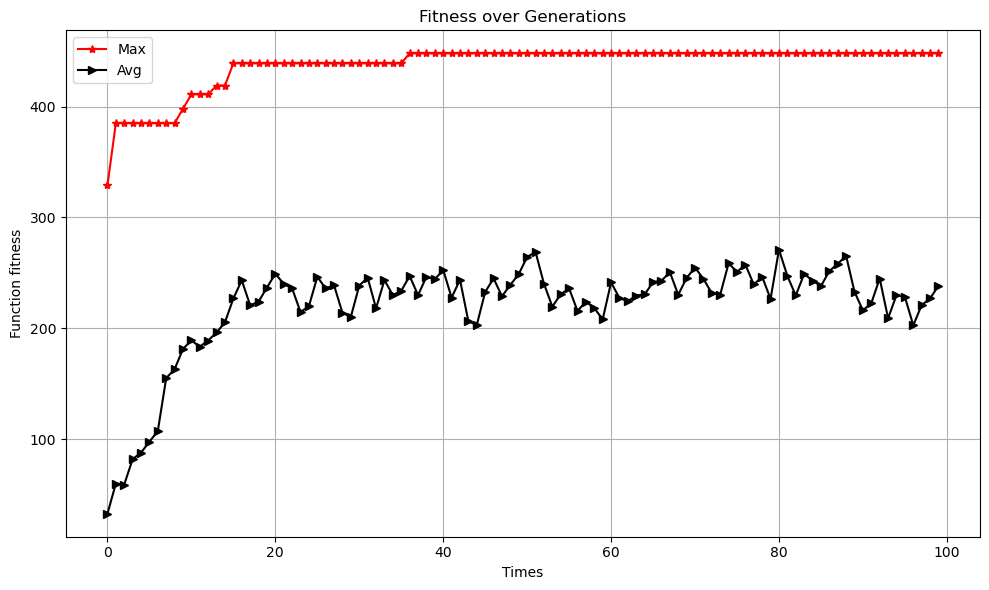

In [185]:
# Teste com 15 itens
best_individual15, best_fiteness_generation15, avg_fitness_per_generation15, finalTime15 = geneticAlgorithm(items15)

print('Combinacao Final:', end=' ')
for index, gene in enumerate(best_individual15[0]):
    if gene == 1:
        print(index, end=' ')
print(f'\nValor Final: {best_individual15[1]}\nTempo Final : {finalTime15:.4f}')

# Gerando grafico
plotGraph(best_fiteness_generation15, avg_fitness_per_generation15)